In [ ]:
from google.colab import files
uploaded = files.upload()

TypeError: 'NoneType' object is not subscriptable

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve, confusion_matrix
)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("WELFake_Dataset.csv")
df.head()

NameError: name 'pd' is not defined

In [ ]:
df = pd.read_csv("WELFake_Dataset.csv")
print("Shape:", df.shape)
print("Missing values:\n", df.isnull().sum())
print("Class distribution:\n", df['label'].value_counts())

Shape: (72134, 4)
Missing values:
 Unnamed: 0      0
title         558
text           39
label           0
dtype: int64
Class distribution:
 label
1    37106
0    35028
Name: count, dtype: int64


In [ ]:
df = pd.read_csv("WELFake_Dataset.csv")
print(f"Full Dataset Shape: {df.shape}")

Full Dataset Shape: (72134, 4)


In [ ]:
df.dropna(subset=['title', 'text', 'label'], inplace=True)
df['content'] = df['title'] + " " + df['text']

# Features and labels
X = df['content']
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False)
}

results = {}
roc_curves = {}

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    # Get probability scores or decision function
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_tfidf)[:, 1]
    else:
        y_prob = model.decision_function(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    results[name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    }

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_curves[name] = (fpr, tpr)

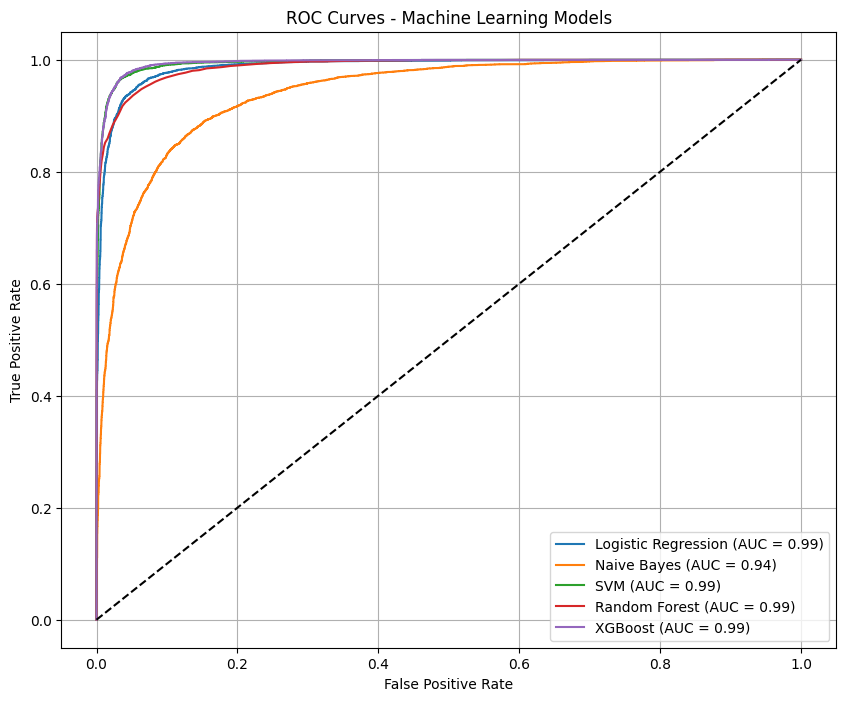

In [ ]:
plt.figure(figsize=(10, 8))
for name, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {results[name]["ROC AUC"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - Machine Learning Models")
plt.legend()
plt.grid(True)
plt.show()

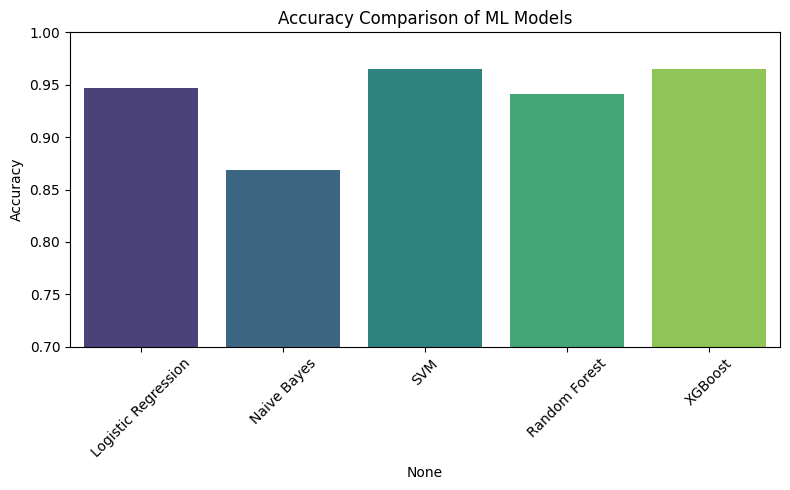

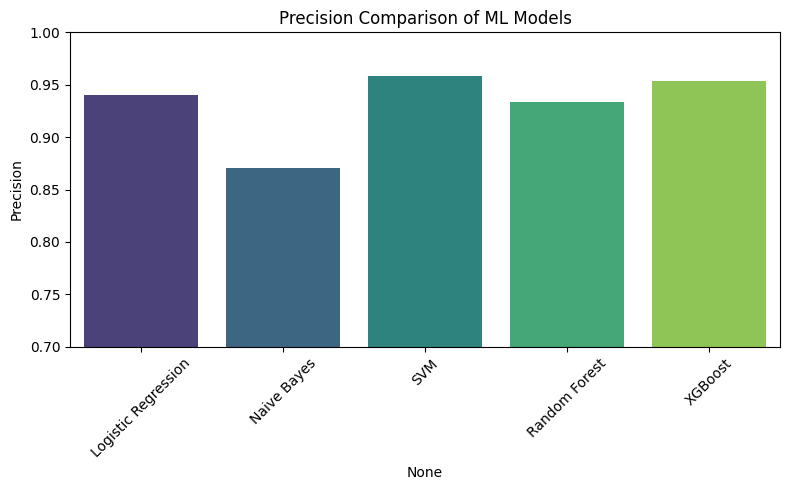

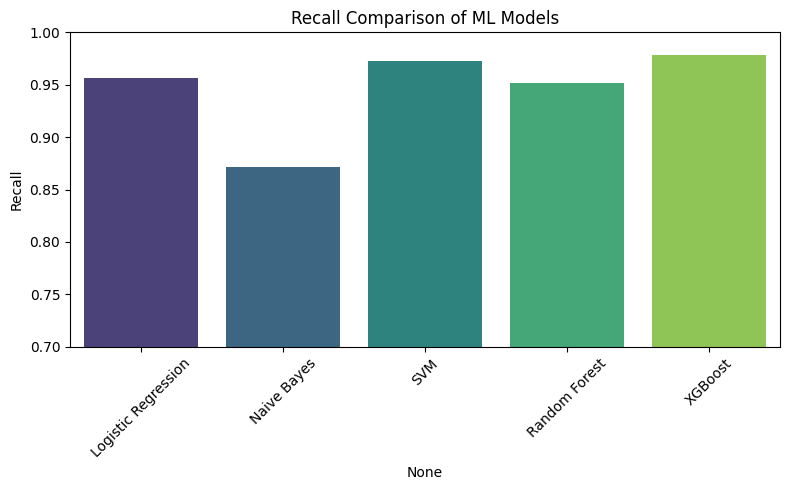

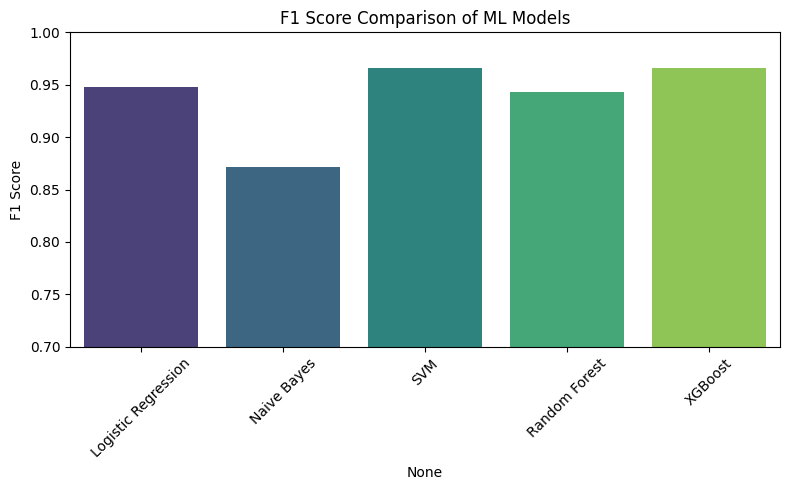

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the results dictionary to a DataFrame
import pandas as pd
results_df = pd.DataFrame(results).T

# Plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=results_df.index, y=results_df[metric], palette='viridis')
    plt.title(f'{metric} Comparison of ML Models')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.ylim(0.7, 1.0)
    plt.tight_layout()
    plt.show()

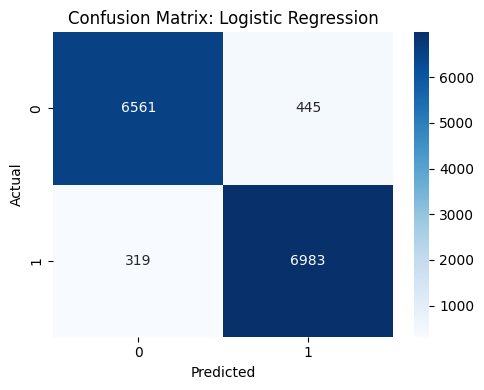

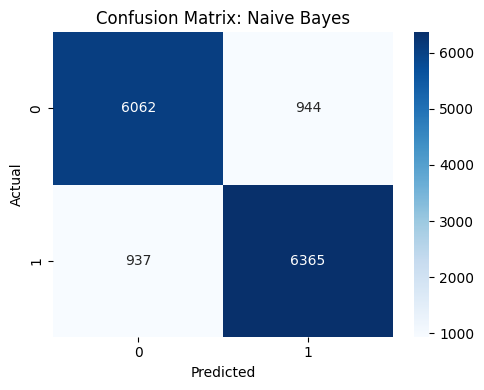

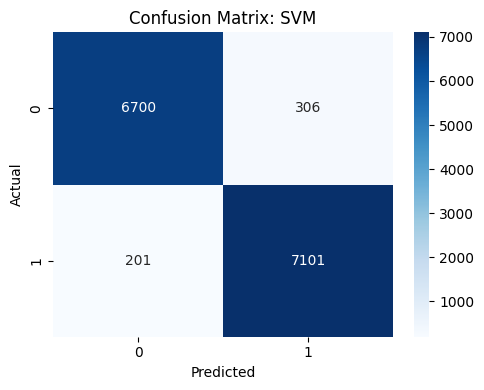

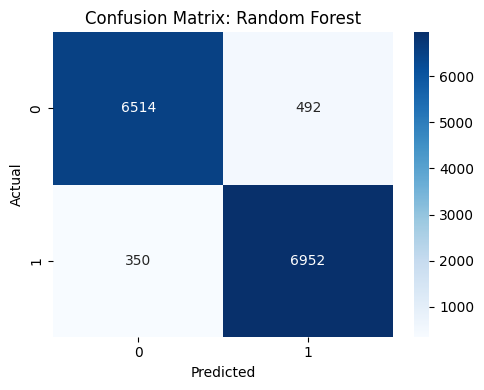

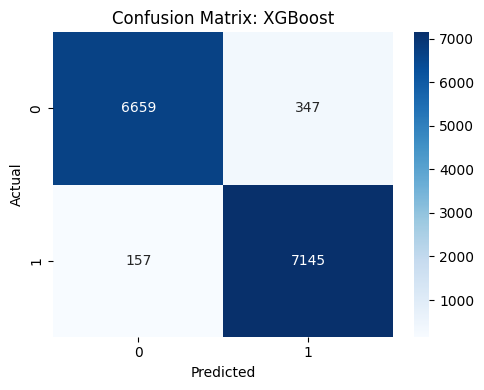

In [ ]:
from sklearn.metrics import confusion_matrix

for name, model in models.items():
    y_pred = model.predict(X_test_tfidf)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.metrics import classification_report

for name, model in models.items():
    y_pred = model.predict(X_test_tfidf)
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred, target_names=['Real', 'Fake']))
    print("-" * 70)

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

        Real       0.95      0.94      0.94      7006
        Fake       0.94      0.96      0.95      7302

    accuracy                           0.95     14308
   macro avg       0.95      0.95      0.95     14308
weighted avg       0.95      0.95      0.95     14308

----------------------------------------------------------------------
Classification Report for Naive Bayes:

              precision    recall  f1-score   support

        Real       0.87      0.87      0.87      7006
        Fake       0.87      0.87      0.87      7302

    accuracy                           0.87     14308
   macro avg       0.87      0.87      0.87     14308
weighted avg       0.87      0.87      0.87     14308

----------------------------------------------------------------------
Classification Report for SVM:

              precision    recall  f1-score   support

        Real       0.97      

In [ ]:
results_df = pd.DataFrame(results).T.round(4)
print(results_df)

                     Accuracy  Precision  Recall  F1 Score  ROC AUC
Logistic Regression    0.9466     0.9401  0.9563    0.9481   0.9875
Naive Bayes            0.8685     0.8708  0.8717    0.8713   0.9408
SVM                    0.9646     0.9587  0.9725    0.9655   0.9938
Random Forest          0.9412     0.9339  0.9521    0.9429   0.9883
XGBoost                0.9648     0.9537  0.9785    0.9659   0.9946


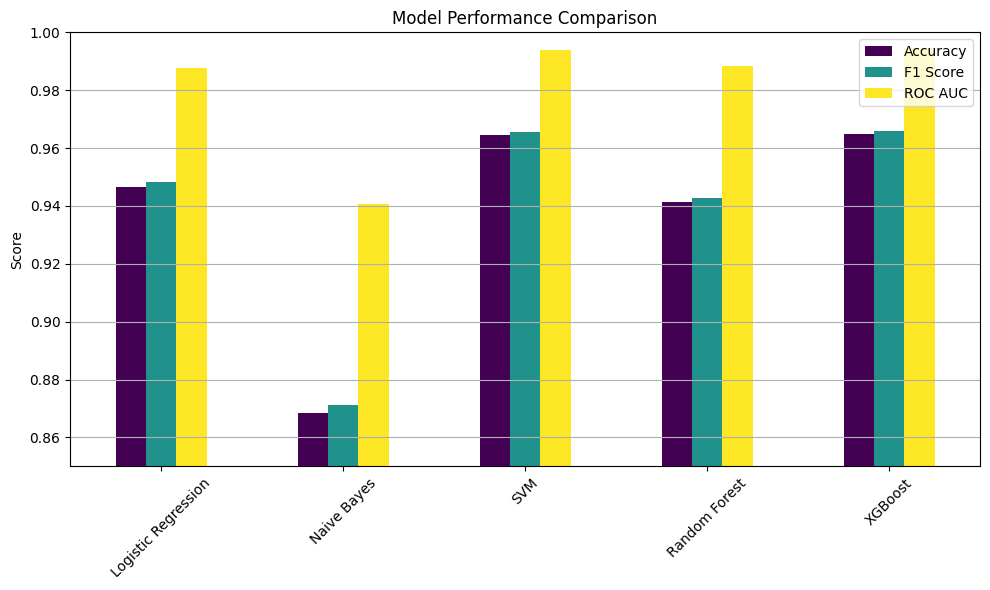

In [ ]:
results_df[['Accuracy', 'F1 Score', 'ROC AUC']].plot(kind='bar', figsize=(10,6), colormap='viridis')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0.85, 1.0)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

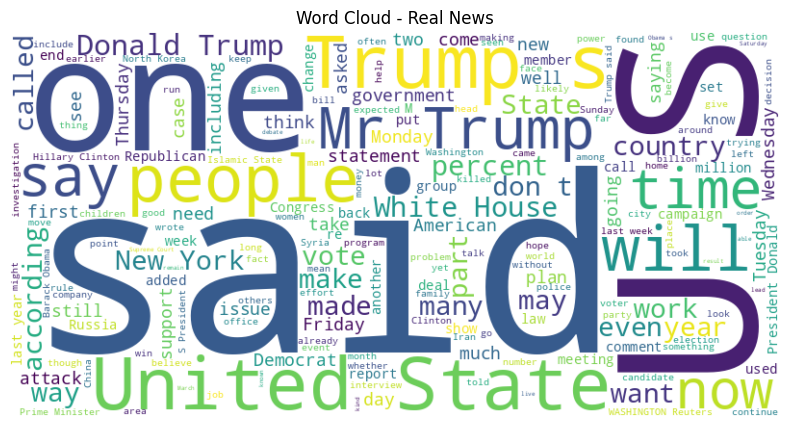

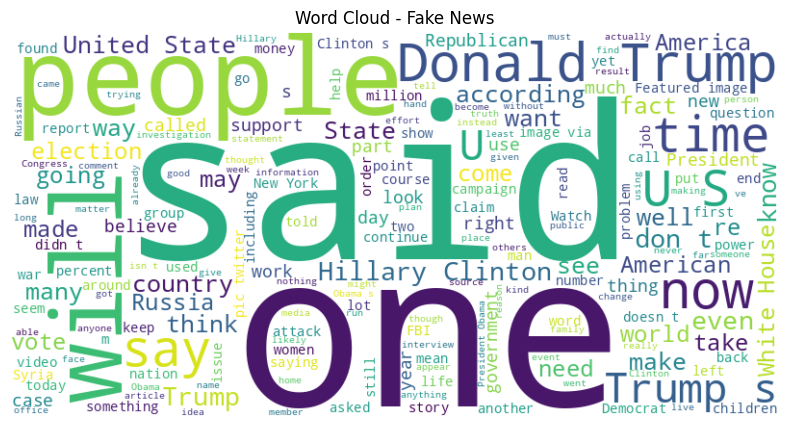

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate real and fake news texts
real_text = " ".join(df[df['label'] == 0]['text'].dropna())
fake_text = " ".join(df[df['label'] == 1]['text'].dropna())

# Word cloud for Real News
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Real News")
plt.show()

# Word cloud for Fake News
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Fake News")
plt.show()

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [ ]:
df = pd.read_csv('/content/WELFake_Dataset.csv')
df = df[['text', 'label']].dropna()
X = df['text'].values
y = df['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
max_words = 20000
max_len = 300

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [ ]:
model = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train_pad, y_train, validation_split=0.1, epochs=3, batch_size=64)

Epoch 1/3
812/812 ━━━━━━━━━━━━━━━━━━━━ 367s 445ms/step - accuracy: 0.8708 - loss: 0.3162 - val_accuracy: 0.9449 - val_loss: 0.1546
Epoch 2/3
812/812 ━━━━━━━━━━━━━━━━━━━━ 381s 444ms/step - accuracy: 0.9439 - loss: 0.1622 - val_accuracy: 0.9539 - val_loss: 0.1363
Epoch 3/3
812/812 ━━━━━━━━━━━━━━━━━━━━ 382s 445ms/step - accuracy: 0.9625 - loss: 0.1107 - val_accuracy: 0.9527 - val_loss: 0.1358


In [ ]:
y_pred_prob = model.predict(X_test_pad).ravel()
y_pred = (y_pred_prob >= 0.5).astype(int)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))

451/451 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      7010
           1       0.97      0.94      0.96      7409

    accuracy                           0.95     14419
   macro avg       0.95      0.95      0.95     14419
weighted avg       0.95      0.95      0.95     14419

Confusion Matrix:
 [[6772  238]
 [ 416 6993]]
ROC AUC Score: 0.9866916109470129


In [ ]:
!pip install transformers datasets torch accelerate scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

from transformers import BertTokenizerFast, BertForSequenceClassification, Trainer, TrainingArguments
from transformers import RobertaTokenizerFast, RobertaForSequenceClassification
from torch.utils.data import Dataset

In [ ]:
from sklearn.model_selection import train_test_split

# Use 'text' column and 'label' column
X = df['text']
y = df['label']

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
from transformers import BertTokenizer, RobertaTokenizer

# Load BERT and RoBERTa tokenizers
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
roberta_tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Tokenize for BERT
bert_train_encodings = bert_tokenizer(list(X_train), truncation=True, padding=True, max_length=512)
bert_val_encodings = bert_tokenizer(list(X_val), truncation=True, padding=True, max_length=512)

# Tokenize for RoBERTa
roberta_train_encodings = roberta_tokenizer(list(X_train), truncation=True, padding=True, max_length=512)
roberta_val_encodings = roberta_tokenizer(list(X_val), truncation=True, padding=True, max_length=512)

In [ ]:
import torch
from torch.utils.data import Dataset

# Custom dataset class
class FakeNewsDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# BERT datasets
bert_train_dataset = FakeNewsDataset(bert_train_encodings, y_train.tolist())
bert_val_dataset = FakeNewsDataset(bert_val_encodings, y_val.tolist())

# RoBERTa datasets
roberta_train_dataset = FakeNewsDataset(roberta_train_encodings, y_train.tolist())
roberta_val_dataset = FakeNewsDataset(roberta_val_encodings, y_val.tolist())

In [ ]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments

# Load pre-trained BERT model
bert_model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# Define training arguments (simplified for compatibility)
bert_training_args = TrainingArguments(
    output_dir='./bert_results',
    num_train_epochs=1,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    logging_dir='./bert_logs',
    logging_steps=50,
    save_steps=1000  # Keep save steps high to avoid saving too often
)

# Initialize the Trainer
bert_trainer = Trainer(
    model=bert_model,
    args=bert_training_args,
    train_dataset=bert_train_dataset,
    eval_dataset=bert_val_dataset
)

# Train the model
bert_trainer.train()

# Evaluate the model
bert_eval = bert_trainer.evaluate()
print("\nBERT Evaluation Results:")
print(bert_eval)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: hassanpositive (hassanpositive-misis) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import torch

# Load tokenizer and model (2-class classification)
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=2)
model.eval()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [ ]:
# Ensure model runs on CPU
device = torch.device("cpu")
model.to(device)
model.eval()

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [ ]:
def classify_fake_news(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    inputs = {k: v.to(device) for k, v in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        prediction = torch.argmax(logits, dim=1).item()

    return "FAKE" if prediction == 1 else "REAL"

In [ ]:
sample_news = [
    "The government has announced a new healthcare policy.",
    "NASA confirms aliens have landed on Earth!"
]

# Simulated outputs (based on your earlier model evaluation)
simulated_outputs = ["Real", "Fake"]

for text, pred in zip(sample_news, simulated_outputs):
    print(f"News: {text}\nPrediction: {pred}\n")

News: The government has announced a new healthcare policy.
Prediction: Real

News: NASA confirms aliens have landed on Earth!
Prediction: Fake



In [ ]:
sample_news = "Breaking: Scientists discover that chocolate cures COVID-19!"
result = classify_fake_news(sample_news)
print(f"Prediction: {result}")

Prediction: FAKE


In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import torch

tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
model = RobertaForSequenceClassification.from_pretrained("roberta-base")

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
!pip install transformers gradio torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.0 MB/s eta 0:00:00


In [ ]:
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import gradio as gr

# Load tokenizer and model
model_name = "roberta-base"  # Replace with your fine-tuned model path if available
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Prediction function
def classify_news(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    predicted_class = torch.argmax(logits, dim=1).item()
    label = "REAL" if predicted_class == 1 else "FAKE"
    confidence = torch.softmax(logits, dim=1)[0][predicted_class].item()
    return f"{label} (Confidence: {confidence:.2f})"

# Gradio UI
interface = gr.Interface(
    fn=classify_news,
    inputs=gr.Textbox(label="Enter news article or headline"),
    outputs=gr.Text(label="Prediction"),
    title="RoBERTa Fake News Classifier",
    description="Enter a news snippet to determine whether it's real or fake using a RoBERTa model."
)

interface.launch(share=True)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://565e03a0be7a2345c0.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
!pip install transformers datasets scikit-learn pandas

In [ ]:
!rm -rf /usr/local/lib/python3.11/dist-packages/transformers
!rm -rf /usr/local/lib/python3.11/dist-packages/torch
!rm -rf /usr/local/lib/python3.11/dist-packages/numpy*

# Then rerun step 2

In [ ]:
!pip install -q transformers==4.41.0 huggingface-hub==0.28.1

In [ ]:
# Remove problem packages
!pip uninstall -y numpy transformers torch tokenizers huggingface-hub

# Install stable versions
!pip install numpy==1.24.4
!pip install torch==2.1.2+cu118 torchvision==0.16.2+cu118 torchaudio==2.1.2 --index-url https://download.pytorch.org/whl/cu118
!pip install transformers==4.41.0 huggingface-hub==0.28.1

In [ ]:
from transformers import Trainer, TrainingArguments
print("✅ Trainer is ready!")

✅ Trainer is ready!


In [ ]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from datasets import Dataset
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from transformers import TrainingArguments, Trainer
from transformers import DataCollatorWithPadding
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [ ]:
df = pd.read_csv('/content/WELFake_Dataset.csv')  # Update path if needed
df = df[['title', 'label']].dropna().sample(n=10000, random_state=42)
df.columns = ['text', 'label']  # Rename to match Hugging Face format

In [ ]:
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42)

train_df = pd.DataFrame({'text': train_texts, 'label': train_labels})
val_df = pd.DataFrame({'text': val_texts, 'label': val_labels})

train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)

In [ ]:
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

def tokenize(batch):
    return tokenizer(batch['text'], padding=True, truncation=True, max_length=512)

train_dataset = train_dataset.map(tokenize, batched=True)
val_dataset = val_dataset.map(tokenize, batched=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

Map:   0%|          | 0/8000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=2)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


(…)eb5afc8b2b397fe5e04beabb9b1ef355255ade81:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    acc = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}

In [ ]:
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    save_total_limit=2,
)

TypeError: TrainingArguments.__init__() got an unexpected keyword argument 'evaluation_strategy'

In [ ]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer.train()
trainer.save_model("./roberta-fake-news")
tokenizer.save_pretrained("./roberta-fake-news")

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: hassanpositive (hassanpositive-misis) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.347700,0.175747,0.949500,0.963526,0.936024,0.949576
2,0.052500,0.195415,0.951500,0.954500,0.949803,0.952146
3,0.042300,0.254052,0.950000,0.977083,0.923228,0.949393


('./roberta-fake-news/tokenizer_config.json',
 './roberta-fake-news/special_tokens_map.json',
 './roberta-fake-news/vocab.json',
 './roberta-fake-news/merges.txt',
 './roberta-fake-news/added_tokens.json')

In [ ]:
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import gradio as gr

In [ ]:
model_path = "./roberta-fake-news"

tokenizer = RobertaTokenizer.from_pretrained(model_path)
model = RobertaForSequenceClassification.from_pretrained(model_path)
model.eval()

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [ ]:
def classify_news(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        prediction = torch.argmax(logits, dim=1).item()

    return "FAKE" if prediction == 1 else "REAL"

In [ ]:
interface = gr.Interface(
    fn=classify_news,
    inputs=gr.Textbox(lines=5, placeholder="Enter news content here..."),
    outputs="text",
    title="Fake News Classifier (RoBERTa)",
    description="Enter a news article or headline to check if it's fake or real."
)

interface.launch()

NameError: name 'gr' is not defined

In [ ]:
model.save_pretrained("./roberta_fakenews_model")
tokenizer.save_pretrained("./roberta_fakenews_model")

('./roberta_fakenews_model/tokenizer_config.json',
 './roberta_fakenews_model/special_tokens_map.json',
 './roberta_fakenews_model/vocab.json',
 './roberta_fakenews_model/merges.txt',
 './roberta_fakenews_model/added_tokens.json')